In [22]:
import numpy as np
from mnist import MNIST
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

from display_network import *

from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import normalize

In [23]:
mndata = MNIST('./MNIST')
mndata.load_testing()

X = mndata.test_images
X0 = np.asarray(X)[:1000,:]/256.0
X = X0
K = 10
kmeans = KMeans(n_clusters=K).fit(X)

pred_label = kmeans.predict(X)

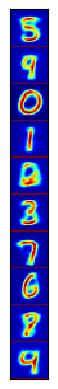

In [24]:
# print(type(kmeans.cluster_centers_.T))
# print(kmeans.cluster_centers_.T.shape)
A = display_network(kmeans.cluster_centers_.T, K, 1)

f1 = plt.imshow(A, interpolation='nearest', cmap = "jet")
f1.axes.get_xaxis().set_visible(False)
f1.axes.get_yaxis().set_visible(False)
plt.show()

cmap = plt.cm.jet
norm = plt.Normalize(vmin=A.min(), vmax=A.max())

image = cmap(norm(A))

plt.imsave('aa.png', image, cmap='gray')

In [25]:
NB = 20
X1 = np.zeros((NB*K, 784))
X2 = np.zeros((NB*K, 784))

for k in range(K):
    Xk = X0[pred_label == k, :]

    center_k = [kmeans.cluster_centers_[k]]
    neigh = NearestNeighbors(n_neighbors=NB).fit(Xk)
    dist, nearest_id  = neigh.kneighbors(center_k, NB)
    
    X1[NB*k: NB*k + NB,:] = Xk[nearest_id, :]
    X2[NB*k: NB*k + NB,:] = Xk[:NB, :]

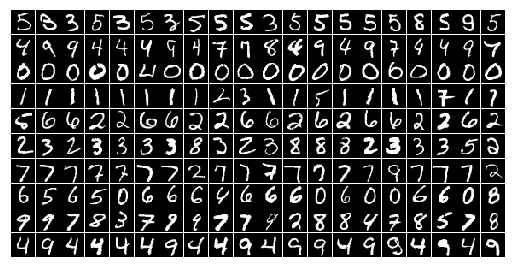

In [26]:
plt.axis('off')
A = display_network(X2.T, K, NB)
f2 = plt.imshow(A, interpolation='nearest' )
plt.gray()
plt.show()